# ECE-6524 / CS-6524 Deep Learning
# Assignment 2 [80 pts]

In this assignment, **you need to complete the following sections**:
1. PyTorch Basics
    - Toy example with PyTorch
2. Image Classification with PyTorch
    - Implement a simple MLP network for image classification
    - Implement a convolutional network for image classification
    - Experiment with different numbers of layers and optimizers
    - Push the performance of your CNN

This assignment is inspired and adopted from the official PyTorch tutorial.
## Submission guideline for the coding part (Jupyter Notebook)

1. Click the Save button at the top of the Jupyter Notebook
2. Please make sure to have entered your Virginia Tech PID below
3. Select Cell -> All Output -> Clear. This will clear all the outputs from all cells (but will keep the content of cells)
4. Select Cell -> Run All. This will run all the cells in order
5. Once you've rerun everything, select File -> Download as -> PDF via LaTeX
6. Look at the PDF file and make sure all your solutions are displayed correctly there 
7. Zip all the files along with this notebook (Please don't include the data). Name it as Assignment_2_Code_[YOUR PID NUMBER].zip
8. Name your PDF file as Assignment_2_NB_[YOUR PID NUMBER].pdf
9. **<span style="color:blue"> Submit your zipped file and the PDF SEPARATELY**</span>

Note: if facing issues with step 5 refer: https://pypi.org/project/notebook-as-pdf/

## Submission guideline for the coding part (Google Colab)

1. Click the Save button at the top of the Notebook
2. Please make sure to have entered your Virginia Tech PID below
3. Follow last two cells in this notebook for guidelines to download pdf file of this notebook
4. Look at the PDF file and make sure all your solutions are displayed correctly there 
5. Zip all the files along with this notebook (Please don't include the data). Name it as Assignment_2_Code_[YOUR PID NUMBER].zip
6. Name your PDF file as Assignment_2_NB_[YOUR PID NUMBER].pdf
7. **<span style="color:blue"> Submit your zipped file and the PDF SEPARATELY**</span>


**While you are encouraged to discuss with your peers, <span style="color:blue">all work submitted is expected to be your own.</span> <span style="color:red">If you use any information from other resources (e.g. online materials), you are required to cite it below you VT PID. Any violation will result in a 0 mark for the assignment.</span>**

### Please Write Your VT PID Here: 906255893
### Reference (if any):

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

https://stackoverflow.com/questions/60050586/pytorch-change-the-learning-rate-based-on-number-of-epochs

https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/lr_scheduling/

https://stackoverflow.com/questions/55157514/implement-dropout-to-fully-connected-layer-in-pytorch

https://stackoverflow.com/questions/59003591/how-to-implement-dropout-in-pytorch-and-where-to-apply-it 

https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html

https://discuss.pytorch.org/t/batch-normalization-of-linear-layers/20989/19

https://www.programcreek.com/python/example/118835/torch.nn.ZeroPad2d

https://stats.stackexchange.com/questions/274601/convolutional-neural-networks-what-is-done-first-padding-or-convolving

https://github.com/pytorch/pytorch/issues/7911

In this homework, you would need to use **Python 3.6+** along with the following packages:
```
1. pytorch 1.2
2. torchvision
3. numpy
4. matplotlib
```
To install pytorch, please follow the instructions on the [Official website](https://pytorch.org/). In addition, the [official document](https://pytorch.org/docs/stable/) could be very helpful when you want to find certain functionalities. 

You can also consider to use Google Colab, where PyTorch has been installed.

# Section 1. PyTorch Basics [10 pts]

Simply put, PyTorch is a **Tensor** library like Numpy. These two libraries similarly provide useful and efficient APIs for you to deal with your tensor data. What really differentiate PyTorch from Numpy are the following two features:
1. Numerical operations that can **run on GPUs** (more than 10x speedup)
2. Automatic differentiation for building and training neural networks

In this section, we will walk through some simple example, and see how the automatic differentiation functionality can make your life much easier.

### To select GPU in Google Colab:
- go to **Edit -> Notebook settings -> Hardware accelerator -> GPU**

In [1]:
import torch # import pytorch.
import torch.nn as nn
import pandas as pd

In [2]:
dtype = torch.float
device = torch.device("cpu")
#device = torch.device("cuda:0") # Uncomment this to run on GPU
#print(torch.cuda.get_device_name(0)) # Check GPU Device name

## 1.1. Automatic Differentiation
Gradient descent is the driving force of the deep learning field. In the lectures and assignment 1, we learned how to derive the gradient for a given function, and implement methods for calculating and performing gradient descents. We also see how we can manually implement the backward and forward functions for the simple NN example. While implementing these functions may not be a big deal for a small network, it may get very nasty when we want to build something with tens of hundreds of layers.

In PyTorch (as well as other major deep learning libraries), we can use autograd ([automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation)) to handle the tedious computation of backward passes. When doing forward passes with autograd, we are essentially defining a **computational graph**, while the nodes in the graph are **tensors**, the edges are the functions that produce output tensors (e.g. ReLU, Linear, Convolutional Layer) given the input tensors. To do backpropagation, we can simply backtrack through this graph to compute gradients. 

This may sound a little bit abstract, so let's take a look at the example:

In [3]:
target = 10.

# create a matrix of size 2x2. Each with value draws from standard normal distribution.
x = torch.randn(2, 2, requires_grad=True) 
y = torch.randn(2, 2, requires_grad=True)

a = x + y # element-wise addition
b = a.sum() # sum of all tensor elements
loss = b - target

# print out each tensor:
print(x)
print(y)
print(a)
print(b)
print(loss)

print("-----gradient-----")
print(x.grad)
print(y.grad)

tensor([[ 0.0949, -0.0138],
        [ 0.2356, -2.0579]], requires_grad=True)
tensor([[ 0.3393, -1.0406],
        [-0.0984, -0.3833]], requires_grad=True)
tensor([[ 0.4342, -1.0544],
        [ 0.1372, -2.4411]], grad_fn=<AddBackward0>)
tensor(-2.9242, grad_fn=<SumBackward0>)
tensor(-12.9242, grad_fn=<SubBackward0>)
-----gradient-----
None
None


In the above example, we have seen a few things:
1. `requires_grad` flag: If false, we can safely exclude this tensor (and its subgraph) from gradient computation and therefore increase efficiency.
2. `grad_fn`: we can see that once an operation is done to a tensor, the output tensor is bound to a backward function associated to the operation. In this case, we have Add, Sum, and Sub.

However, even if we set `requires_grad=True`, we still don't have gradient for `x` and `y`. This is because that we haven't performed the backpropagation yet. So let's do it:

In [4]:
# perform backpropagation from this "node"
loss.backward()
print('-----gradient-----')
print(x.grad)
print(y.grad)

-----gradient-----
tensor([[1., 1.],
        [1., 1.]])
tensor([[1., 1.],
        [1., 1.]])


Great, seems like we can perform gradient descent without writing backwards function! Now, let's see a simple toy example on how we can fit some weights `w1` and `w2` with random input `x` and target `y`: 

In [5]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold input and outputs.
# Setting requires_grad=False indicates that we do not need to compute gradients (becaue these are inputs)
# with respect to these Tensors during the backward pass.
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Create random Tensors for weights.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y using operations on Tensors; these
    # are exactly the same operations we used to compute the forward pass using
    # Tensors, but we do not need to keep references to intermediate values since
    # we are not implementing the backward pass by hand.
    y_pred = x.mm(w1).clamp(min=0).mm(w2) # .mm is matrix multiplication; .clamp is element-wise lower bound

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum() # .pow is exponential
    if t % 100 == 99:
        print(f'iteration {t}: {loss.item()}')
    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call w1.grad and w2.grad will be Tensors holding the gradient
    # of the loss with respect to w1 and w2 respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.  (because we don't need the gradient for the operation 
    # learning_rate * w1.grad)
    # An alternative way is to operate on weight.data and weight.grad.data.
    # Recall that tensor.data gives a tensor that shares the storage with
    # tensor, but doesn't track history.
    # You can also use torch.optim.SGD to achieve this.
    with torch.no_grad(): # disables gradient calculation for gradient enabled items in the indent (saves memory)
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_() # re-defines the gradient as zeros
        w2.grad.zero_()

iteration 99: 459.8053894042969
iteration 199: 1.9945298433303833
iteration 299: 0.015411265194416046
iteration 399: 0.0003314874484203756
iteration 499: 4.998676376999356e-05


## 1.2. `nn` Module
Computational graphs and autograd are a very powerful paradigm for defining complex operators and automatically taking derivatives; however for large neural networks raw autograd can be a bit too low-level.

When building neural networks we frequently think of arranging the computation into layers, some of which have learnable parameters which will be optimized during learning.

In PyTorch, the nn package serves this purpose. The nn package defines a set of Modules, which are roughly equivalent to neural network layers. A Module receives input Tensors and computes output Tensors, but may also hold internal state such as Tensors containing learnable parameters. The nn package also defines a set of useful loss functions that are commonly used when training neural networks.

Now, let's see how our simple NN could be implemented using the nn module.

In [6]:
import torch.nn as nn
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10 # add variables to add layers

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = nn.Sequential(
    nn.Linear(D_in, H),
    nn.ReLU(),                    # change this line to change the type of activation functions, add lines to add layers
    nn.Linear(H, D_out),
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = nn.MSELoss(reduction='sum') # change this line to change type of loss function

learning_rate = 1e-4                  # change this line to change the learning rate
for t in range(500):                  # training loop
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(x) #this line predicts

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(f'iteration {t}: {loss.item()}')

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

iteration 99: 1.9561800956726074
iteration 199: 0.03138311579823494
iteration 299: 0.0011750109260901809
iteration 399: 7.658985123271123e-05
iteration 499: 6.7862251853512134e-06


So far, we have been updating the model parameters manually with `torch.no_grad()`. However, if we want to use optimization algorithms other than SGD, it might get a bit nasty to do it manually. Instead of manually doing this, we can use `optim` pacakge to help optimize our model: 

In [7]:
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Use the nn package to define our model and loss function.
model = nn.Sequential(
    nn.Linear(D_in, H),
    nn.ReLU(),
    nn.Linear(H, D_out),
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. 
learning_rate = 1e-4
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # apply SGD on parameters(weights), with a specified learning rate
for t in range(500):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(f'iteration {t}: {loss.item()}')

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

iteration 99: 2.2279138565063477
iteration 199: 0.02976147085428238
iteration 299: 0.000836348976008594
iteration 399: 3.2277690479531884e-05
iteration 499: 1.4482692449746537e-06


Sometimes you will want to specify models that are more complex than a sequence of existing Modules; for these cases you can define your own Modules by subclassing nn.Module and defining a forward which receives input Tensors and produces output Tensors using other modules or other autograd operations on Tensors.

For example, we can implement our 2-layer simple NN as the following:

In [8]:
# Earlier we had one layer, here we make a whole class just for two layer NN
class TwoLayerNet(nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(TwoLayerNet, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred


# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Construct our model by instantiating the class defined above
model = TwoLayerNet(D_in, H, D_out)

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
for t in range(500):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(f'iteration {t}: {loss.item()}')

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

iteration 99: 2.4409382343292236
iteration 199: 0.03862939774990082
iteration 299: 0.0010430209804326296
iteration 399: 3.347339225001633e-05
iteration 499: 1.210722643918416e-06


## 1.3. Warm-up: Two-moon datasets [10 pts]
Now, let's use PyTorch to solve some synthetic datasets. In previous assignment, we have to write some codes to create training batches. Again, this can also be done with PyTorch `DataLoader`. The `DataLoader` utilizes parallel workers to read and prepare batches for you, which can greatly speedup the code when your time bottleneck is on file I/O.

Here, we show a simple example that can create a dataloader from numpy data:

### Setup for Google Colab (Skip for Jupyter Notebook)

In [9]:
#from google.colab import drive
#drive.mount('/content/drive')

In [10]:
# Find path to your data folder in drive and enter for "path_to_dataset"
path_to_dataset = 'C:/My Files/Python Projects/CS 6524 - Deep Learning/Assignment_2/data'
# For Jupyter notebook give path from your local PC

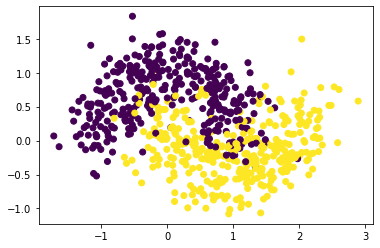

In [11]:
import numpy as np
import matplotlib.pyplot as plt

X_train = np.loadtxt(path_to_dataset + '/X1_train.csv', delimiter=',')
X_test = np.loadtxt(path_to_dataset + '/X1_test.csv', delimiter=',')
y_train = np.loadtxt(path_to_dataset + '/y1_train.csv', delimiter=',')
y_test = np.loadtxt(path_to_dataset + '/y1_test.csv', delimiter=',')

# Plot it to see why is it called two-moon dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train);

Now, let's create a PyTorch `DataLoader`:

In [12]:
from torch.utils.data import TensorDataset, DataLoader
batch_size = 64 # mini-batch size
num_workers = 4 # how many parallel workers are we gonna use for reading data
shuffle = True # shuffle the dataset

# Convert numpy array import torch tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train.reshape(-1, 1))
y_test = torch.LongTensor(y_test.reshape(-1, 1))

# First, create a dataset from torch tensor. A dataset defines how to read data
# and process data for creating mini-batches.
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, 
                          num_workers=num_workers, shuffle=shuffle)

In [13]:
print(X_train.shape)
print(y_train.shape)

torch.Size([700, 2])
torch.Size([700, 1])


Below, we provide a simple example on how to train your model with this dataloader:

In [14]:
epoch = 5 # an epoch means looping through all the data in the datasets
lr = 1e-1

# create a simple model that is probably not gonna work well
model = nn.Linear(X_train.size(1), 1)
optim = torch.optim.SGD(model.parameters(), lr=lr)

for e in range(epoch):
    loss_epoch = 0
    # loop through train loader to get x and y
    for x, y in train_loader:
        optim.zero_grad()
        y_pred = model(x)
        # !!WARNING!!
        # THIS IS A CLASSIFICATION TASK, SO YOU SHOULD NOT
        # USE THIS LOSS FUNCTION. 
        loss = (y_pred - y.float()).abs().mean()
        loss.backward()
        optim.step()
        loss_epoch += loss.item()
    print(f'Epoch {e}: {loss_epoch}')

Epoch 0: 4.042147874832153
Epoch 1: 2.980900391936302
Epoch 2: 2.909360408782959
Epoch 3: 2.897918224334717
Epoch 4: 2.8876380026340485


### 1.3.1 Your Simple NN [10 pts]
Now, it is time for you to implement your own model for this classification task. Your job here is to:
1. Complete the SimpleNN class. It should be a 2- or 3-layer NN with proper non-linearity.
2. Train your model with SGD optimizer.
3. Tune your model a bit so you can achieve at least 80% accuracy on training set.
Hint: you might want to look up `nn.ReLU`, `nn.Sigmoid`, `nn.BCELoss` in the [official document](https://pytorch.org/docs/stable/). You are allowed to freely pick the hyperparameters of your model.
4. **Please note this is a binary classification problem.**

In [15]:
class SimpleNN(nn.Module):
    
    def __init__(self):
        super(SimpleNN, self).__init__()
        ################################################################################
        # TODO:                                                                        #
        # Construct your small feedforward NN here.                                    #
        ################################################################################
        self.linear1 = nn.Linear(X_train.size(1),X_train.size(1))
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.linear2 = nn.Linear(X_train.size(1),X_train.size(1))
        self.linear3 = nn.Linear(X_train.size(1),y_train.size(1))
        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################
            
    def forward(self, x):
        ################################################################################
        # TODO:                                                                        #
        # feed the input to your network, and output the predictions.                  #
        ################################################################################
        h_relu1 = self.relu(self.linear1(x)).clamp(min=0)
        h_relu2 = self.relu(h_relu1)
        y_pred = self.linear3(h_relu2).clamp(min=0, max=1)
        return y_pred
        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################

In [16]:
epoch = 50 # an epoch means looping through all the data in the datasets
lr = 0.5e-2

# create a simple model that is probably not gonna work well

################################################################################
# TODO:                                                                        #
# Initialize your model and SGD optimizer here.                                #
################################################################################
model = SimpleNN()
criterion = nn.BCELoss(reduction='mean')
optim = torch.optim.SGD(model.parameters(), lr=lr)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

for e in range(epoch):
    loss_epoch = 0  # record accmulative loss for each epoch
    ################################################################################
    # TODO:                                                                        #
    # Loop through the dataloader and train your model with nn.BCELoss.            #
    ################################################################################
    for x, y in train_loader:
        optim.zero_grad()
        y_pred = model(x)
        # Compute and print loss
        loss = criterion(y_pred, y.float())
        loss.backward()
        optim.step()
        loss_epoch += loss.item()   
    print(f'Epoch {e}: {loss_epoch}')
    ################################################################################
    #                                 END OF YOUR CODE                             #
    ################################################################################

Epoch 0: 343.997332572937
Epoch 1: 33.01499265432358
Epoch 2: 16.892427265644073
Epoch 3: 16.67810082435608
Epoch 4: 16.322940051555634
Epoch 5: 10.159232199192047
Epoch 6: 9.889030039310455
Epoch 7: 6.690589368343353
Epoch 8: 6.498433738946915
Epoch 9: 6.363052129745483
Epoch 10: 6.237988710403442
Epoch 11: 6.113109618425369
Epoch 12: 6.011174499988556
Epoch 13: 5.910803526639938
Epoch 14: 5.813974916934967
Epoch 15: 5.740914195775986
Epoch 16: 5.672750473022461
Epoch 17: 5.579660952091217
Epoch 18: 5.523961246013641
Epoch 19: 5.440015763044357
Epoch 20: 6.856804579496384
Epoch 21: 6.775015324354172
Epoch 22: 6.805482059717178
Epoch 23: 6.7342745661735535
Epoch 24: 6.57165002822876
Epoch 25: 6.51840928196907
Epoch 26: 6.4454182386398315
Epoch 27: 6.395413368940353
Epoch 28: 6.349895179271698
Epoch 29: 6.291986584663391
Epoch 30: 6.244314104318619
Epoch 31: 6.190547466278076
Epoch 32: 6.149473309516907
Epoch 33: 6.10388919711113
Epoch 34: 6.0606381595134735
Epoch 35: 6.021833717823029


In [17]:
# helper function for computing accuracy
def get_acc(pred, y):
    pred = pred.float()
    y = y.float()
    return (y==pred).sum().float()/y.size(0)*100.

Evaluate your accuracy:

In [18]:
y_pred = (model(X_train) > 0.5)
train_acc = get_acc(y_pred, y_train)

y_pred = (model(X_test) > 0.5)
test_acc = get_acc(y_pred, y_test)
print(f'Training accuracy: {train_acc}, Testing accuracy: {test_acc}')

Training accuracy: 80.28571319580078, Testing accuracy: 81.33333587646484


# Section 2. Image Classification with CNN [70 pts]
Now, we are back to the image classification problem. In this section, our goal is to, again, train models on CIFAR-10 to perform image classification. Your tasks here are to:
1. Build and Train a simple feed-forward Neural Network (consists of only nn.Linear layer with activation function) for the classification task
2. Build and Train a **Convolutional** Neural Network (CNN) for the classification task
3. Try different settings for training your CNN
4. Reproduce

In the following cell, we provide the code for creating a CIFAR10 dataloader. As you can see, PyTorch's `torchvision` package actually has an interface for the CIFAR10 dataset: 

In [19]:
import torchvision
import torchvision.transforms as transforms

# Preprocessing steps on the training/testing data. You can define your own data augmentation
# here, and PyTorch's API will do the rest for you.
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# This will automatically download the dataset for you if it cannot find the data in root
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## 2.1 Simple NN [10 pts]
Implement a simple feed-forward neural network, and train it on the CIFAR-10 training set. Here's some specific requirements:
1. The network should only consists of `nn.Linear` layers and the activation functions of your choices (e.g. `nn.Tanh`, `nn.ReLU`, `nn.Sigmoid`, etc). 
2. Train your model with `torch.optim.SGD` with the hyperparameters you like the most. 

Note that the hyperparameters work in previous assignment might not work the same, as the implementations of layers could be different.

### 2.1.1 Design and training [8 pts]

In [20]:
class SimpleNN(nn.Module):
    
    def __init__(self,n_input, n_classes):
        super(SimpleNN, self).__init__()
        ################################################################################
        # TODO:                                                                        #
        # Construct your small feedforward NN here.                                    #
        ################################################################################
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()
        self.linear1 = nn.Linear(n_input,128)
        #self.linear2 = nn.Linear(64,16)
        self.linear3 = nn.Linear(128,n_classes)
        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################
        
    def forward(self, x):
        # note that: here, the data is of the shape (B, C, H, W)
        # where B is the batch size, C is color channels, and H
        # and W is height and width.
        # To feed it into the linear layer, we need to reshape it
        # with .view() function.
        batch_size = x.size(0)
        x = x.view(batch_size, -1) # reshape the data from (B, C, H, W) to (B, C*H*W)
        ################################################################################
        # TODO:                                                                        #
        # Forward pass, output the prediction score.                                   #
        ################################################################################
        h_relu1 = self.relu(self.linear1(x))
        #h_relu2 = self.relu(self.linear2(h_relu1))
        y_pred = self.linear3(h_relu1)
        return y_pred
        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################
        
       

In [21]:
#import pandas as pd
#y_df = torch.from_numpy(np.multiply(np.array(pd.get_dummies(y)), np.array(y[:, np.newaxis])))
#print(y.size())

In [55]:
epoch = 10
lr = 0.5e-1
n_input = 3072
n_classes = 10

train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

################################################################################
# TODO:                                                                        #
# Your training code here.                                                     #
################################################################################
model = SimpleNN(n_input, n_classes)
loog = nn.LogSoftmax()
#criterion1 = nn.MSELoss(reduction='mean')
criterion2 = nn.CrossEntropyLoss(reduction='mean')
optim = torch.optim.SGD(model.parameters(), lr=lr)

for e in range(epoch):
    loss_epoch = 0  # record accmulative loss for each epoch
    for x, y in train_loader:
        #y_df = torch.from_numpy(np.array(pd.get_dummies(y)))
        #y_df = torch.from_numpy(np.multiply(np.array(pd.get_dummies(y)), np.array(y[:, None])))
        optim.zero_grad()
        y_pred = model(x)
        #logits = loog(y_pred, dim=1)
        # Compute and print loss
        #loss = criterion1(y_pred, y_df.float())
        loss = criterion2(y_pred, y)
        loss.backward()
        optim.step()
        loss_epoch += loss.item()   
    print(f'Epoch {e}: {loss_epoch}')
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################



Epoch 0: 1310.7541319131851
Epoch 1: 1187.2067142128944
Epoch 2: 1133.4428404569626
Epoch 3: 1093.5442214012146
Epoch 4: 1063.0170793533325
Epoch 5: 1032.396923482418
Epoch 6: 1007.3433351516724
Epoch 7: 986.3450821042061
Epoch 8: 966.4079872369766
Epoch 9: 950.0153229236603


Now evaluate your model with the helper function:

In [53]:
def get_model_acc(model, loader):
    ys = []
    y_preds = []
    for x, y in loader:
        ys.append(y)
        # set the prediction to the one that has highest value
        # Note that the the output size of model(x) is (B, 10)
        y_preds.append(torch.argmax(model(x), dim=1))
    y = torch.cat(ys, dim=0)
    y_pred = torch.cat(y_preds, dim=0)
    print((y == y_pred).sum())
    return get_acc(y_pred, y)

### 2.1.2 Evaluate NN [2 pts]
Evaluate your NN. You should get an accuracy around **50%** on training set and **49%** on testing set.

In [54]:
train_acc = get_model_acc(model, train_loader)
test_acc = get_model_acc(model, test_loader)
print(f'Training accuracy: {train_acc}, Testing accuracy: {test_acc}')

tensor(30198)
tensor(4873)
Training accuracy: 60.39599609375, Testing accuracy: 48.72999954223633


## 2.2 Convolutional Neural Network (CNN) [60 pts]
Convolutional layer has been proven to be extremely useful for vision-based task. As mentioned in the lecture, this speical layer allows the model to learn filters that capture crucial visual features. 



### 2.2.1 Implement and Evaluate CNN [15 pts]
In this section, you will need to construct a CNN for classifying CIFAR-10 image. Specifically, you need to:
1. build a `CNNClassifier` with `nn.Conv2d`, `nn.Maxpool2d` and activation functions that you think are appropriate. 
2. You would need to flatten the output of your convolutional networks with `view()`, and feed it into a `nn.Linear` layer to predict the class labels of the input. 

Once you are done with your module, train it with `optim.SGD`, and evaluate it. You should get an accuracy around **55%** on training set and **53%** on testing set.

Hint: You might want to look up `nn.Conv2d`, `nn.Maxpool2d`, `nn.CrossEntropyLoss()`, `view()` and `size()`.

In [25]:
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [26]:
class CNNClassifier(nn.Module):
    
    def __init__(self):
        super(CNNClassifier, self).__init__()
        ################################################################################
        # TODO:                                                                        #
        # Construct a CNN with 2 or 3 convolutional layers and 1 linear layer for      #
        # outputing class prediction. You are free to pick the hyperparameters         #
        ################################################################################
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()
        self.conv1 = nn.Conv2d(in_channels= 3, out_channels= 6, kernel_size= (5, 5), stride=(1, 1))
        self.conv2 = nn.Conv2d(in_channels= 6, out_channels= 10, kernel_size= (5, 5), stride=(1, 1))
        self.nopool = nn.MaxPool2d(kernel_size=(1, 1), stride=(1, 1))
        self.pool = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        self.fc1 = nn.Linear(1440, 10)
        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################
        
        
    def forward(self, x):
        ################################################################################
        # TODO:                                                                        #
        # Forward pass of your network. First extract feature with CNN, and predict    #
        # class scores with linear layer. Be careful about your input/output shape.    #
        ################################################################################
        L1 = self.conv1(x)
        A1 = self.relu(L1)
        L2 = self.conv2(A1)
        A2 = self.relu(L2)
        P = self.pool(A2)
        P = P.view(-1, 1440)
        y_pred = self.fc1(P)
        return y_pred
        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################

In [27]:
# You can tune these hyperparameters as you like.
epoch = 10
lr = 1e-1
n_input = 3072
n_classes = 10
batch_size = 64
num_workers = num_workers

train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

################################################################################
# TODO:                                                                        #
# Your training code here.                                                     #
################################################################################
model = CNNClassifier()
criterion = nn.CrossEntropyLoss(reduction='mean')
optim = torch.optim.SGD(model.parameters(), lr=lr)

for e in range(epoch):
    loss_epoch = 0  # record accmulative loss for each epoch
    for x, y in train_loader:
        optim.zero_grad()
        y_pred = model(x)
        loss = criterion(y_pred, y)
        loss.backward()
        optim.step()
        loss_epoch += loss.item()   
    print(f'Epoch {e}: {loss_epoch}')
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

Epoch 0: 1346.1375125646591
Epoch 1: 1094.7937898635864
Epoch 2: 1023.9885115027428
Epoch 3: 986.9946244359016
Epoch 4: 967.6558980345726
Epoch 5: 949.2772778272629
Epoch 6: 936.8154314756393
Epoch 7: 928.7873584628105
Epoch 8: 923.2326212525368
Epoch 9: 912.9903720021248


In [28]:
# turn on evaluation mode. This is crucial when you have BatchNorm in your network,
# as you want to use the running mean/std you obtain durining training time to normalize
# your input data. Rememeber to call .train() function after evaluation
model.eval()
train_acc = get_model_acc(model, train_loader)
test_acc = get_model_acc(model, test_loader)
print(f'Training accuracy: {train_acc}, Testing accuracy: {test_acc}')

tensor(27996)
tensor(5093)
Training accuracy: 55.992000579833984, Testing accuracy: 50.93000030517578


<span style="color:red">**Explain your design and hyperparameter choice in three or four sentences:**</span>

### 2.2.2 STACK MORE LAYERS [20 pts]
Now, **try at least 4 network architectures with different numbers of convolutional layers**. Train these settings with `optim.SGD`, plot the training/testing accuracy as a fuction of convolutional layers and describe what you have observed (running time, performance, etc). **Please make sure your figures are with clear legends and labels**.

Epoch 0: 1367.6025564670563
Epoch 1: 1160.055477976799
Epoch 2: 1086.6813896894455
Epoch 3: 1050.5588245391846
Epoch 4: 1023.9805533289909
Epoch 5: 1004.7851570248604
Epoch 6: 991.8736841082573
Epoch 7: 980.5361415743828
Epoch 8: 972.2141416668892
Epoch 9: 964.1871168017387
tensor(27108)
tensor(5194)
Epoch 0: 1441.8738029003143
Epoch 1: 1158.2617857456207
Epoch 2: 1084.2183108329773
Epoch 3: 1030.382139325142
Epoch 4: 981.7172821760178
Epoch 5: 939.8931796550751
Epoch 6: 908.6770750880241
Epoch 7: 885.8234311938286
Epoch 8: 868.9094648957253
Epoch 9: 853.3241126537323
tensor(31166)
tensor(5837)
Epoch 0: 1450.030819773674
Epoch 1: 1200.2273219823837
Epoch 2: 1116.8519477844238
Epoch 3: 1059.6884330511093
Epoch 4: 1011.1001118421555
Epoch 5: 971.353840470314
Epoch 6: 937.3617902994156
Epoch 7: 910.3374658823013
Epoch 8: 886.7259957790375
Epoch 9: 866.8454926609993
tensor(29952)
tensor(5617)
Epoch 0: 1662.2089253664017
Epoch 1: 1324.675388455391
Epoch 2: 1197.879613161087
Epoch 3: 1134.85

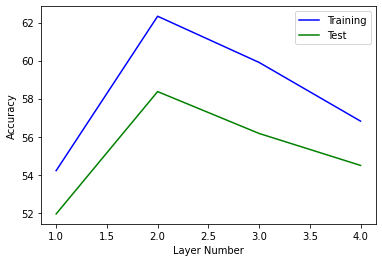

In [31]:
class Flex_CNNClassifier(nn.Module):
    
    def __init__(self, conv_layer_num):
        super(Flex_CNNClassifier, self).__init__()
        self.lrs = conv_layer_num
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()
        self.conv1 = nn.Conv2d(in_channels= 3, out_channels= 6, kernel_size= (5, 5), stride=(1, 1))
        self.conv2 = nn.Conv2d(in_channels= 6, out_channels= 10, kernel_size= (5, 5), stride=(1, 1))
        self.conv3 = nn.Conv2d(in_channels= 10, out_channels= 16, kernel_size= (5, 5), stride=(1, 1))
        self.conv4 = nn.Conv2d(in_channels= 16, out_channels= 20, kernel_size= (5, 5), stride=(1, 1))
        self.pool = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        self.fc1 = nn.Linear((14**2)*6, 10)
        self.fc2 = nn.Linear((12**2)*10, 10)
        self.fc3 = nn.Linear((10**2)*16, 10)
        self.fc4 = nn.Linear((8**2)*20, 10)
    
    def forward(self, x):
        L1 = self.conv1(x)
        A1 = self.relu(L1)
        L2 = self.conv2(A1)
        A2 = self.relu(L2)
        L3 = self.conv3(A2)
        A3 = self.relu(L3)
        L4 = self.conv4(A3)
        A4 = self.relu(L4)
        if self.lrs == 1:
            P = self.pool(A1)
            P = P.view(-1, (14**2)*6)
            y_pred = self.fc1(P)
        elif self.lrs == 2:
            P = self.pool(A2)
            P = P.view(-1, (12**2)*10)
            y_pred = self.fc2(P)
        elif self.lrs == 3:
            P = self.pool(A3)
            P = P.view(-1, (10**2)*16)
            y_pred = self.fc3(P)
        elif self.lrs == 4:
            P = self.pool(A4)
            P = P.view(-1, (8**2)*20)
            y_pred = self.fc4(P)       
        else:
            print("Layer number out of bounds")
        return y_pred

################################################################################
# TODO:                                                                        #
# Your training code here.                                                     #
################################################################################
# Type your code here
acc_hist_1 = np.zeros(4)
acc_hist_2 = np.zeros(4)
lr = 1e-2
lrs = np.array([1,2,3,4])

for i in range(4):
    model = Flex_CNNClassifier(conv_layer_num=lrs[i])
    criterion = nn.CrossEntropyLoss(reduction='mean')
    optim = torch.optim.SGD(model.parameters(), lr=lr)

    for e in range(epoch):
        loss_epoch = 0  # record accmulative loss for each epoch
        for x, y in train_loader:
            optim.zero_grad()
            y_pred = model(x)
            loss = criterion(y_pred, y)
            loss.backward()
            optim.step()
            loss_epoch += loss.item()   
        print(f'Epoch {e}: {loss_epoch}')
    
    model.eval()
    acc_hist_1[i] = get_model_acc(model, train_loader)
    acc_hist_2[i] = get_model_acc(model, test_loader)
    
fig=plt.figure()
ax=fig.add_subplot(111)
 
ax.plot(lrs,acc_hist_1,c='b',ls='-',label='Training')
ax.plot(lrs,acc_hist_2,c='g',ls='-',label='Test')
plt.ylabel('Accuracy');
plt.xlabel('Layer Number'); 
plt.legend(loc=1)
plt.show()
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

<span style="color:red">**Briefly explain what you have observed in three or four sentences. Does stacking layers always give you better results? How about the computational time?:**</span>

I observed that accuracy increases sharply when moving from 1 to 2 convolutional layers (given the implemented batch size, learning rate, number of epochs, and network structure). However, it seems to decline after the second layer. So, stacking the layers does not always give better results. With regards to computational time; two layers required almost 56% more time than one layer. Training 3 layers used almost the same computing time as 2 layers. While training 4 layers took around 100% more computing time than training 1 layer.

### 2.2.3 Optimizer? Optimizer! [15 pts]
So far, we only use SGD as our optimizer. Now, pick two other optimizers, train your favorite CNN models, and compare the performance you get. What did you see?

C:\Users\Mohamed\anaconda3\lib\site-packages\torch\optim\lr_scheduler.py:118: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch: 0 LR: [0.1]
Epoch 0: 1568.715371966362
Epoch: 1 LR: [0.1]
Epoch 1: 1316.8971726894379
Epoch: 2 LR: [0.1]
Epoch 2: 1230.996357679367
Epoch: 3 LR: [0.1]
Epoch 3: 1187.2535238265991
Epoch: 4 LR: [0.010000000000000002]
Epoch 4: 1068.2154883742332
Epoch: 5 LR: [0.010000000000000002]
Epoch 5: 1046.491004884243
Epoch: 6 LR: [0.010000000000000002]
Epoch 6: 1037.3748940229416
Epoch: 7 LR: [0.010000000000000002]
Epoch 7: 1028.8273550868034
Epoch: 8 LR: [0.010000000000000002]
Epoch 8: 1022.1391524672508
Epoch: 9 LR: [0.0010000000000000002]
Epoch 9: 1007.390858232975
tensor(27006)
tensor(5095)
Epoch: 0 LR: [0.1]
Epoch 0: 2404.5809268951416
Epoch: 1 LR: [0.1]
Epoch 1: 1807.9622678756714
Epoch: 2 LR: [0.1]
Epoch 2: 1807.788645029068
Epoch: 3 LR: [0.1]
Epoch 3: 1807.7257747650146
Epoch: 4 LR: [0.010000000000000002]
Epoch 4: 1801.6532595157623
Epoch: 5 LR: [0.010000000000000002]
Epoch 5: 1801.442007780075
Epoch: 6 LR: [0.010000000000000002]
Epoch 6: 1801.429447889328
Epoch: 7 LR: [0.01000000000

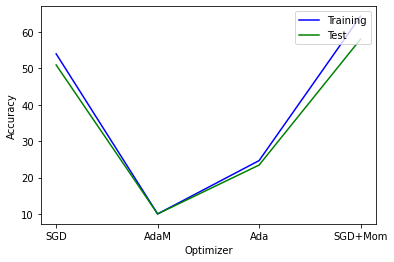

In [32]:
epoch = 10
lr = 1e-1
n_input = 3072
n_classes = 10
batch_size = 64
num_workers = num_workers

train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

################################################################################
# TODO:                                                                        #
# Your training code here.                                                     #
################################################################################
acc_hist_1 = np.zeros(4)
acc_hist_2 = np.zeros(4)

fns = np.array([1,2,3,4])

for i in range(4):
    model = CNNClassifier()
    criterion = nn.CrossEntropyLoss(reduction='mean')
    # Note: for all my suggested optimizers, I wrap them in a learning rate decay schedule to decay LR
    if i==0:
        # original setting
        optim = torch.optim.SGD(model.parameters(), lr=1e-1)
        scheduler = torch.optim.lr_scheduler.StepLR(optim, step_size = 5, gamma=0.1, last_epoch=-1)
    elif i==1:
        # setting suggested in class (ADAM)
        optim = torch.optim.Adam(model.parameters(), lr=1e-1, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
        scheduler = torch.optim.lr_scheduler.StepLR(optim, step_size = 5, gamma=0.1, last_epoch=-1)
    elif i==2:
        # Adaptive Gradient
        optim = torch.optim.Adagrad(model.parameters(), lr=1e-1, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)
        scheduler = torch.optim.lr_scheduler.StepLR(optim, step_size = 5, gamma=0.1, last_epoch=-1)
    elif i==3:
        # SGD + Momentum
        optim = torch.optim.SGD(model.parameters(), lr=1e-1, momentum=lr, dampening=0, weight_decay=0, nesterov=False)
        scheduler = torch.optim.lr_scheduler.StepLR(optim, step_size = 5, gamma=0.1, last_epoch=-1)
        # SGD Nesterov (commented out)
        #optim.SGD(params, lr=lr, momentum=0, dampening=0, weight_decay=0, nesterov=True)
        # LBFGS (commented out)
        #optim.LBFGS(params, lr=lr, max_iter=20, max_eval=None, tolerance_grad=1e-07, tolerance_change=1e-09, history_size=100, line_search_fn=None)
        # RMSProp (commented out)
        #optim.RMSprop(params, lr=lr, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)
    else:
        print("i is out of bounds")
        
    for e in range(epoch):
        # Decay Learning Rate
        scheduler.step()
        # Print Learning Rate
        print('Epoch:', e,'LR:', scheduler.get_last_lr())
        loss_epoch = 0  # record accmulative loss for each epoch
        for x, y in train_loader:
            optim.zero_grad()
            y_pred = model(x)
            loss = criterion(y_pred, y)
            loss.backward()
            optim.step()
            loss_epoch += loss.item()
        print(f'Epoch {e}: {loss_epoch}')
    
    model.eval()
    acc_hist_1[i] = get_model_acc(model, train_loader)
    acc_hist_2[i] = get_model_acc(model, test_loader)
    
fig=plt.figure()
ax=fig.add_subplot(111)
 
ax.plot(['SGD','AdaM','Ada','SGD+Mom'],acc_hist_1,c='b',ls='-',label='Training')
ax.plot(['SGD','AdaM','Ada','SGD+Mom'],acc_hist_2,c='g',ls='-',label='Test')
plt.ylabel('Accuracy');
plt.xlabel('Optimizer'); 
plt.legend(loc=1)
plt.show()
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

<span style="color:red">**What did you see? Which optimizer is your favorite? Describe:**</span>

I observe that for this particular problem, the SGD+Momentum optimizer yields the best results.

### 2.2.4 Improve Your Model [10 pts]
Again, we want you to play with your model a bit harder, and improve it. You are free to use everything you can find in the documents (`BatchNorm`, `SeLU`, etc), as long as it is not a **predefined network architectures in PyTorch package**. You can also implement some famous network architectures to push the performance. 

(A simple network with 5-6 `nn.Conv2d` can give you at least 70% accuracy on testing set).

In [50]:
################################################################################
# TODO:                                                                        #
# Your training code here.                                                     #
################################################################################

### Building Modified AlexNet with dropout

class ModAlex_Classifier(nn.Module):
    
    def __init__(self):
        super(ModAlex_Classifier, self).__init__()
        ################################################################################
        # TODO:                                                                        #
        # Construct a CNN with 2 or 3 convolutional layers and 1 linear layer for      #
        # outputing class prediction. You are free to pick the hyperparameters         #
        ################################################################################
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()
        self.dropout = nn.Dropout(p=0.2)
        self.bn1 = nn.BatchNorm2d(96)
        self.bn2 = nn.BatchNorm2d(256)
        self.pad1 = nn.ZeroPad2d(1)
        self.pad2 = nn.ZeroPad2d(2)
        self.conv1 = nn.Conv2d(in_channels= 3, out_channels= 96, kernel_size= (5, 5), stride=(1, 1))
        self.conv2 = nn.Conv2d(in_channels= 96, out_channels= 256, kernel_size= (3, 3), stride=(1, 1))
        self.conv3 = nn.Conv2d(in_channels= 256, out_channels= 384, kernel_size= (2, 2), stride=(1, 1))
        self.conv4 = nn.Conv2d(in_channels= 384, out_channels= 384, kernel_size= (2, 2), stride=(1, 1))
        self.conv5 = nn.Conv2d(in_channels= 384, out_channels= 256, kernel_size= (2, 2), stride=(1, 1))
        self.nopool = nn.MaxPool2d(kernel_size=(1, 1), stride=(1, 1))
        self.pool2 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        self.pool3 = nn.MaxPool2d(kernel_size=(3, 3), stride=(2, 2))
        self.fc6 = nn.Linear((3*3*256), 4096)
        self.fc7 = nn.Linear(4096, 4096)
        self.fc8 = nn.Linear(4096, 10)
        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################
        
        
    def forward(self, x):
        ################################################################################
        # TODO:                                                                        #
        # Forward pass of your network. First extract feature with CNN, and predict    #
        # class scores with linear layer. Be careful about your input/output shape.    #
        ################################################################################
        L1 = self.conv1(x)
        #print(L1.size())
        Pool1 = self.pool2(L1)
        B1 = self.bn1(Pool1)
        A1 = self.relu(B1)
        D1 = self.dropout(A1)
        Pad1 = self.pad1(D1)
        L2 = self.conv2(Pad1)
        #print(L2.size())
        Pool2 = self.pool2(L2)
        B2 = self.bn2(Pool2)
        A2 = self.relu(B2)
        D2 = self.dropout(A2)
        Pad2 = self.pad1(D2)
        L3 = self.conv3(Pad2)
        #print(L3.size())
        A3 = self.relu(L3)
        L4 = self.conv4(A3)
        #print(L4.size())
        A4 = self.relu(L4)
        L5 = self.conv5(A4)
        #print(L5.size())
        Pool3 = self.pool2(L5)
        F = Pool3.view(-1, (3**2)*256)
        FC6 = self.fc6(F)
        FC7 = self.fc7(FC6)
        FC8 = self.fc8(FC7)
        y_pred = FC8
        return y_pred
        ################################################################################
        #                                 END OF YOUR CODE                             #
        ################################################################################


################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

In [51]:
# Training and Testing
epoch = 10
lr = 1e-1
n_input = 3072
n_classes = 10
batch_size = 64
num_workers = num_workers

train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

model = ModAlex_Classifier()
criterion = nn.CrossEntropyLoss(reduction='mean')
optim = torch.optim.SGD(model.parameters(), lr=1e-1, momentum=1e-1, dampening=0, weight_decay=0, nesterov=False)
scheduler = torch.optim.lr_scheduler.StepLR(optim, step_size = 5, gamma=0.1, last_epoch=-1)

for e in range(epoch):
    # Decay Learning Rate
    scheduler.step()
    # Print Learning Rate
    print('Epoch:', e,'LR:', scheduler.get_last_lr())
    loss_epoch = 0  # record accmulative loss for each epoch
    for x, y in train_loader:
        optim.zero_grad()
        y_pred = model(x)
        loss = criterion(y_pred, y)
        loss.backward()
        optim.step()
        loss_epoch += loss.item()
    print(f'Epoch {e}: {loss_epoch}')
    
model.eval()
train_acc = get_model_acc(model, train_loader)
test_acc = get_model_acc(model, test_loader)
print(f'Training accuracy: {train_acc}, Testing accuracy: {test_acc}')

Epoch: 0 LR: [0.1]
Epoch 0: 1160.6814322471619
Epoch: 1 LR: [0.1]
Epoch 1: 810.3750056922436
Epoch: 2 LR: [0.1]
Epoch 2: 646.8717033565044
Epoch: 3 LR: [0.1]
Epoch 3: 543.6128820776939
Epoch: 4 LR: [0.010000000000000002]
Epoch 4: 352.8277967572212
Epoch: 5 LR: [0.010000000000000002]
Epoch 5: 308.9448258280754
Epoch: 6 LR: [0.010000000000000002]
Epoch 6: 284.99368415772915
Epoch: 7 LR: [0.010000000000000002]
Epoch 7: 261.9217217862606
Epoch: 8 LR: [0.010000000000000002]
Epoch 8: 241.31869158148766
Epoch: 9 LR: [0.0010000000000000002]
Epoch 9: 209.38201734423637
tensor(46804)
tensor(8143)
Training accuracy: 93.60800170898438, Testing accuracy: 81.43000030517578


### Guidelines for Downloading PDF in Google Colab
- Run below cells only in Google Colab, Comment out in case of Jupyter notebook

In [ ]:
#Run below two lines (in google colab), installation steps to get .pdf of the notebook

#!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
#!pip install pypandoc

# After installation, comment above two lines and run again to remove installation comments from the notebook.

In [ ]:
# Find path to your notebook file in drive and enter in below line

#!jupyter nbconvert --to PDF "your_notebook_path_here/DL_Assignment_2.ipynb"

#Example: "/content/drive/My Drive/DL_Fall_2020/Assignment_2/DL_Assignment_2.ipynb"